# Module: preprocessing

This module contains preprocessing functions.  Preprocessing submodules include preprocess (reshape, bin, and crap data), background (fit and subtract background), and electron_count (electron counting).

## Submodule: darkreference

The notebook demos functions related to background fitting and subtraction.  The demos below include functions for:
* Get dark references
* Get background subtracted diffraction patterns

Note that the functions for obtaining dark references here use the edge region of diffraction patterns, which are assumed to be blocked by an aperture.  If separate dark references scans have been obtained, these should just be averaged directly.

In [1]:
import py4DSTEM

import numpy as np
import matplotlib.pyplot as plt

from py4DSTEM.file.datastructure import DiffractionSlice, RealSlice
from py4DSTEM.process.preprocess import get_darkreference
from py4DSTEM.process.preprocess import get_bksbtr_DP

In [2]:
fp = "/home/ben/Data/20181213_a-Si_TEAM1_shiteng/AmSi_2.h5"
dc = py4DSTEM.file.readwrite.read(fp)

/home/ben/Data/20181213_a-Si_TEAM1_shiteng/AmSi_2.h5 is a py4DSTEM file, v0.3. Reading...


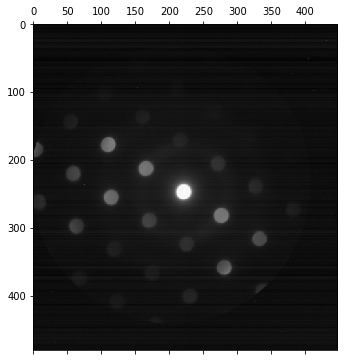

In [3]:
ave_dp = np.average(dc.data4D,axis=(0,1))

fig,ax = plt.subplots(figsize=(6,6)) 
ax.matshow(ave_dp**0.001)
plt.show()

In [4]:
# Get background streaking in the x- and y-directions

darkref = get_darkreference(datacube=dc, N_frames=50,      # number of random DPs to average
                                         width_x=30,       # width of strip on side of DP to average streaks over
                                         width_y=30,          
                                         side_x='end',     # use a strip on the array left/right (top/bottom)
                                         side_y='end')


# For comparison, get the dark reference from only horizontal/vertical streaking
darkref_x = get_darkreference(datacube=dc, N_frames=50,
                                           width_x=30,
                                           width_y=0,          
                                           side_x='end')

darkref_y = get_darkreference(datacube=dc, N_frames=50,
                                           width_x=0,
                                           width_y=30,
                                           side_y='end')

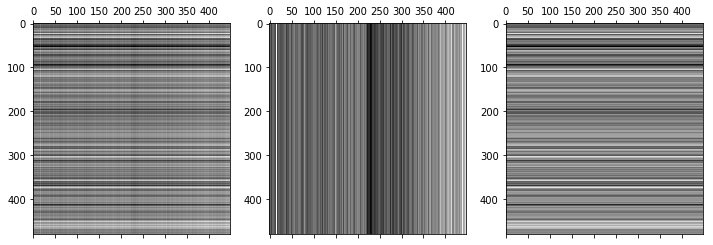

In [6]:
# Show backgrounds

fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(12,8))
ax1.matshow(darkref)
ax2.matshow(darkref_x)
ax3.matshow(darkref_y)
plt.show()

/home/ben/Software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in power
  if sys.path[0] == '':
/home/ben/Software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in power
  del sys.path[0]
/home/ben/Software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in power
  


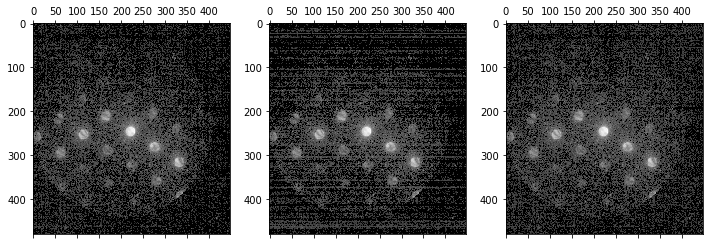

In [12]:
# Get a background subtracted diffraction patterns

Rx,Ry = 50,50
power=0.2

DP_bksbtr = get_bksbtr_DP(dc, darkref, Rx, Ry)
DP_bksbtr_x = get_bksbtr_DP(dc, darkref_x, Rx, Ry)
DP_bksbtr_y = get_bksbtr_DP(dc, darkref_y, Rx, Ry)

# Show
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(12,8))
ax1.matshow(np.where(DP_bksbtr>=0,DP_bksbtr**power,0))
ax2.matshow(np.where(DP_bksbtr_x>=0,DP_bksbtr_x**power,0))
ax3.matshow(np.where(DP_bksbtr_y>=0,DP_bksbtr_y**power,0))
plt.show()

/home/ben/Software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in power
  import sys


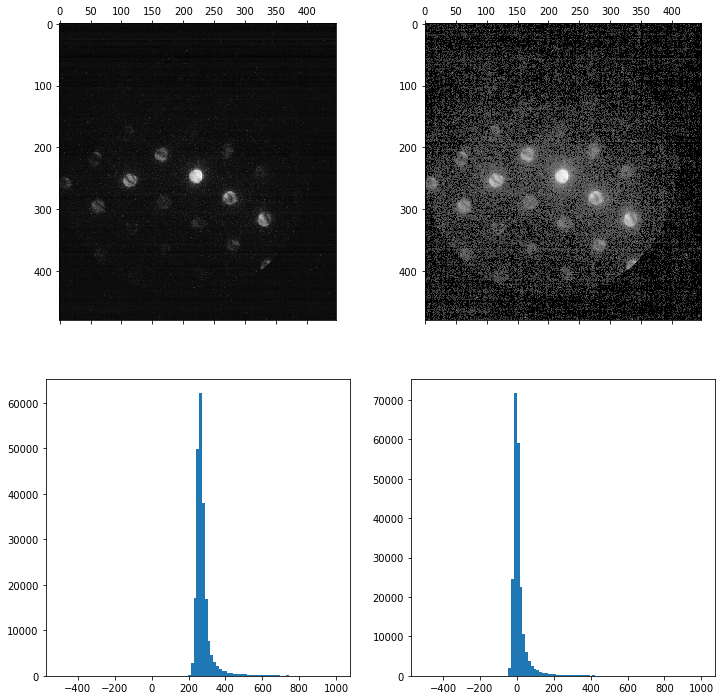

In [13]:
# Compare to original DP

power=0.2

fig,((ax11,ax12),(ax21,ax22)) = plt.subplots(2,2, figsize=(12,12))
ax11.matshow(dc.data4D[Rx,Ry,:,:]**power)
ax12.matshow(np.where(DP_bksbtr>=0,DP_bksbtr**power,0))
ax21.hist(dc.data4D[Rx,Ry,:,:].ravel(),bins=np.linspace(-500,1000,100))
ax22.hist(DP_bksbtr.ravel(),bins=np.linspace(-500,1000,100))
plt.show()